# Lab 2: Intro to PyTorch

## Deliverable

For this lab, you will submit an IPython notebook via Learning Suite.
This lab will be mostly boilerplate code, but you will be required to implement a few extras.

**NOTE: you almost certainly will not understand most of what's going on in this lab!
That's ok - the point is just to get you going with PyTorch.
We'll be working on developing a deeper understanding of every part of this code
over the course of the next two weeks.**

A major goal of this lab is to help you become conversant in working through PyTorch
tutorials and documentation.
You should turn to the documentation first, but you may google whatever you need, as there are many great PyTorch tutorials online.

This notebook will have four parts:

* Part 1: Your notebook should contain the boilerplate code. See below.

* Part 2: Your notebook should contain a testing loop.

* Part 3: Your notebook should contain a visualization of test/training performance over time.

The resulting image could, for example, look like this:
![example image](http://liftothers.org/dokuwiki/lib/exe/fetch.php?cache=&w=900&h=608&tok=3092fe&media=cs501r_f2018:lab2.png)

* Part 4: Your notebook should contain the completed microtasks and pass all the asserts.

See the assigned readings for pointers to documentation on PyTorch.
___

### Grading standards:
Your notebook will be graded on the following:

* 40% Successfully followed lab video and typed in code
* 20% Modified code to include a test/train split
* 20% Modified code to include a visualization of train/test losses
* 10% Tidy and legible figures, including labeled axes where appropriate
* 10% Correct solutions to the microtasks
___

### Description
Throughout this class, we will be using PyTorch to implement our deep neural networks. 
PyTorch is a deep learning framework that handles the low-level details of 
GPU integration and automatic differentiation.

The goal of this lab is to help you become familiar with PyTorch. 
The four parts of the lab are outlined above.

For part 1, you should watch the video below, and type in the code as it is explained to you.

A more detailed outline of Part 1 is below.

For part 2, you must add a validation (or testing) loop using the 
FashionMNIST dataset with train=False

For part 3, you must plot the loss values.

For part 4, you must complete the microtasks and pass all asserts.

Optional: Demonstrate overfitting on the training data.

The easiest way to do this is to limit the size of your training dataset 
so that it only returns a single batch (i.e. len(dataloader) == batch_size, 
and train for multiple epochs. For example,
I set my batch size to 42, and augmented my dataloader to produce only 42 
unique items by overwriting the len function to return 42. 
In my training loop, I performed a validation every epoch which basically corresponded 
to a validation every step.

In practice, you will normally compute your validation loss every n steps, 
rather than at the end of every epoch. This is because some epochs can take hours, 
or even days and you don’t often want to wait that long to see your results.

Testing your algorithm by using a single batch and training until overfitting 
is a great way of making sure that your model and optimizer are working the way they should!

___

### Part 0
Watch Tutorial Video

[https://youtu.be/E76hLX9WCLE](https://youtu.be/E76hLX9WCLE)

**TODO:**

**DONE:**
* ✔ Watch Tutorial Video

### Part 1
Your notebook should contain the boilerplate code. See below.

**TODO:**

**DONE:**
* ✔ Replicate boilerplate from the video

___

### Part 2
Your notebook should contain a testing (validation) loop.

**TODO:**

**DONE:**
* ✔ Add a testing (validation) loop

In [23]:
!pip install torch 
!pip install torchvision
!pip install tqdm

# Note to TAs
To help me process and understand the video so I can best retain the information (and use it for reference later), I included a _ton_ of comments in my code below. 

I recognize that so many comments reduces simplicity in readability; thanks for your understanding.

In [24]:
# ===============================================
# Write the boilerplate code from the video here
# ===============================================

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
# See: https://pytorch.org/tutorials/beginner/basics/data_tutorial.html
from torch.utils.data import Dataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms, utils, datasets
# tqdm creates a progress bar. See: https://github.com/tqdm/tqdm#readme
# See also: https://tqdm.github.io/
from tqdm import tqdm

# You need to request a GPU from Runtime > Change Runtime Type
assert torch.cuda.is_available()

# ===============================================
# Extend the torch.Module class to create your own neural network
# ===============================================

# See: https://pytorch.org/docs/stable/notes/extending.html#extending-torch-nn
# Create the neural network model, which holds parameters and gradients
# In PyTorch, all models inherit from the torch.nn.Module class
class LinearNetwork(nn.Module):
    def __init__(self, dataset):
        # Call the superclass, to get parameters from the class that this belongs to
        super(LinearNetwork, self).__init__()
        x, y = dataset[0]
        # Since we're working with images, call the torch function .size() to get the dimensions
        channels, height, width = x.size()
        # There are 10 possible classes this network predicts
        out_dimensions = 10

        # Create the network. nn.Sequential() is a class that can hold all 
        # other modules within it, in a hierarchy. It cascades methods down
        # such that the output of one becomes the input to the next.
        # nn.Linear is a fully-connected layer.
        # The first argument for each layer is the number of inputs.
        # The second argument for each layer is the number of outputs.
        # The output number for one layer should be the same as the input number
        # for the layer that follows it.
        output_number = 1000
        input_number = output_number
        self.net = nn.Sequential(
            nn.Linear(channels * height * width, output_number), 
            nn.ReLU(),
            nn.Linear(input_number, out_dimensions)
        )

    # Pass data forward through the network, as a batch
    def forward(self, x):
        batch_num, channels, height, width = x.size()
        # Flatten data into a 2-dimensional matrix so it can be passed
        # through the Linear layers (comes in as a 4-D matrix, because of batch count)
        flattened = x.view(batch_num, channels * height * width)
        return self.net(flattened)

    # DON'T OVERWRITE THE backward() FUNCTION -- it calculates the gradient

# ===============================================
# Create a dataset class that extends the torch.utils.data Dataset class here
# ===============================================

# See: https://pytorch.org/tutorials/beginner/basics/data_tutorial.html
# Create a dataset loader, inheriting from the torch.utils.data.Dataset class
class FashionMNISTProcessedDataset(Dataset):
    # root is the directory to save in
    def __init__(self, root, train=True):
        # See: https://pytorch.org/vision/stable/datasets.html#fashion-mnist
        self.data = datasets.FashionMNIST(
            root,
            train=True,
            transform = transforms.ToTensor(),
            download=True)
    
    def __getitem__(self, i):
        x, y = self.data[i]
        return x, y

    def __len__(self):
        return len(self.data)

# ===============================================
# Instantiate the train and validation datasets
# ===============================================
train_dataset = FashionMNISTProcessedDataset(root='/tmp/fashionmnist', train=True)
val_dataset = FashionMNISTProcessedDataset(root='/tmp/fashionmnist', train=False)

# ===============================================
# Instantiate your data loaders
# Create batches from the training and validation datasets
# ===============================================
train_loader = DataLoader(train_dataset, batch_size=50, pin_memory=True)
validation_loader = DataLoader(val_dataset, batch_size=50)

# ===============================================
# Instantiate your model, loss, and optimizer functions
# ===============================================
model = LinearNetwork(train_dataset)
model = model.cuda()
# Set cost (loss) function to Cross Entropy Loss
objective = torch.nn.CrossEntropyLoss()
# The optimizer minimizes the cost function
optimizer = optim.SGD(params=model.parameters(), lr=1e-4)


# ===============================================
# Run your training / validation loops
# ===============================================

# An epoch ends when all batches of training data have been processed
num_epochs = 100
loop = tqdm(total=len(train_loader) * num_epochs, position=0)

# Initialize variables for validation
train_losses = []
validation_losses = []
counter = 0

# Training loop
for epoch in range(num_epochs):
    batch = 0
    for x, y_truth in train_loader:
        # load tensors on GPU (non_blocking=True means "don't wait until all data has moved from CPU to GPU")
        x, y_truth = x.cuda(non_blocking=True), y_truth.cuda(non_blocking=True)
        # Clear the optimizer gradient so it can be updated
        optimizer.zero_grad()
        # Predicted values are y_hat
        y_hat = model(x)
        # Determine the loss
        loss = objective(y_hat, y_truth)

        # Validate every on the first batch every 5 epochs
        if (epoch % 5 == 0) and batch == 0:
            train_losses.append(loss.item())
            validation_loss_list = []
            # Validation loop (same as training loop, but w/ validation data)
            for val_x, val_y_truth in validation_loader:
                val_x, val_y_truth = val_x.cuda(non_blocking=True), val_y_truth.cuda(non_blocking=True)
                val_y_hat = model(val_x)
                validation_loss_list.append(objective(val_y_hat, val_y_truth).item())
            # Save the average of the loss
            validation_losses.append(sum(validation_loss_list) / float(len(validation_loss_list)))
        loop.set_description(f'epoch: {epoch}'
                            f', batch: {batch:d}'
                            f', loss: {loss.item():.4f}'
                            f', val_loss: {validation_losses[-1]:.4f}')
        # Compute the gradient on each level of the model (network)
        loss.backward()

        # Take a step to decrease the cost (loss) function
        optimizer.step()
        batch += 1

# End training, hide output display
loop.close()

epoch: 99, batch: 1199, loss: 0.6827, val_loss: 0.6596:   0%|          | 0/120000 [18:12<?, ?it/s]


In [29]:
# View the number of parameters
# torch.numel = number of elements
num_params = sum([torch.numel(layer) for layer in model.parameters()])
print(f'Total parameters: {num_params:,d}')

Total parameters: 795,010



___

### Part 3
Your notebook should contain a visualization of test/training
performance over time. Use matplotlib.pyplot, and label the graph's axes.

**TODO:**

**DONE:**
* Add a visualization of test/train performance (i.e. loss) over time.

In [ ]:
# View the list of losses calculated every 5 epochs
train_losses

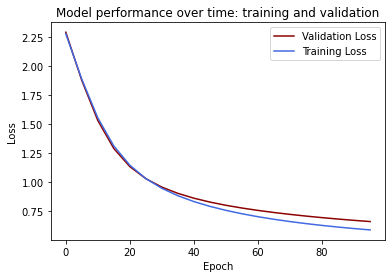

In [31]:
# Write your code to create a plot of your loss over time
fig = plt.figure()
ax = fig.add_subplot(111)
epoch_count = [5 * item for item in range(len(validation_losses))]
ax.plot(epoch_count, validation_losses, label='Validation Loss', c='darkred')
ax.plot(epoch_count, train_losses, label='Training Loss', c='royalblue')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model performance over time: training and validation')
plt.show()


___

### Part 4
Complete the following microtasks to learn some important PyTorch skills.

If you do not know how to complete one of the microtasks, use [PyTorch's documentation](https://pytorch.org/docs/stable/index.html)! PyTorch is very well documented, and you will need to learn how to use the documentation, especially in later labs.

**TODO:**

**DONE:**
* Complete microtasks

### Computation Graph Microtasks

In [32]:
# To understand how PyTorch organizes the computation graph, let's walk through 
# a quick example!

# 1. First, construct a tensor 'a' that contains 10 random floats. 
# This will simulate the output layer of a network. Hint: use `torch.rand`.
a = torch.rand(10)
print(a)
assert a.size() == torch.Size([10])

tensor([0.8713, 0.0704, 0.3029, 0.9503, 0.5776, 0.2419, 0.5028, 0.9189, 0.9371,
        0.0245])


In [33]:
# 2. Now turn 'a' into an `nn.Parameter` so that it be attached to the computation
# graph.

a = nn.Parameter(data=a)
print(a)
assert type(a) == nn.Parameter

# Notice that our original tensor 'a' is nested inside of a Parameter object.
# The Parameter object knows that it will need to compute gradients at some point.

# No need to do anything here, but this assert should pass.
assert a.requires_grad == True

Parameter containing:
tensor([0.8713, 0.0704, 0.3029, 0.9503, 0.5776, 0.2419, 0.5028, 0.9189, 0.9371,
        0.0245], requires_grad=True)


In [35]:
# 3. Let's run 'a' through a loss function. The output of the loss function is
# just another tensor, but this tensor remembers what operations produced it.
loss_fn = nn.CrossEntropyLoss()
loss = loss_fn(a.unsqueeze(0), torch.Tensor([7]).long())
print(loss)

# Now, instruct the network to do a backward pass, by calling '.backward()' on the 
# result of the loss function. We should now be able to see the gradients that 
# were computed for 'a' w.r.t. the loss.
loss.backward()
assert a.grad is not None
print(a.grad)

tensor(1.9823, grad_fn=<NllLossBackward0>)
tensor([ 0.1313,  0.0590,  0.0744,  0.1421,  0.0979,  0.0700,  0.0909, -0.8622,
         0.1403,  0.0563])


In [36]:
# 4. If we were to use 'a' in another operation, this might affect the computation graph.
# To make sure that you are not adversly affecting the computation graph, call
# `.detach()` on 'a' and assign the result to a new variable 'b'.
b = a.detach()
print(a)
print(b)
assert a.requires_grad == True
assert b.requires_grad == False

Parameter containing:
tensor([0.8713, 0.0704, 0.3029, 0.9503, 0.5776, 0.2419, 0.5028, 0.9189, 0.9371,
        0.0245], requires_grad=True)
tensor([0.8713, 0.0704, 0.3029, 0.9503, 0.5776, 0.2419, 0.5028, 0.9189, 0.9371,
        0.0245])
